In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d samuelcortinhas/apples-or-tomatoes-image-classification

apples-or-tomatoes-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/apples-or-tomatoes-image-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 294 files belonging to 2 classes.
Found 97 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 196608)            0         
                                                                 
 dense_9 (Dense)             (None, 128)               25165952  
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 25,174,273
Trainable params: 25,174,273
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=15,validation_data=validation_ds)

Epoch 1/15
10/10 [==============================] - 2s 172ms/step - loss: 0.2178 - accuracy: 0.9490 - val_loss: 2.6655 - val_accuracy: 0.6186
Epoch 2/15
10/10 [==============================] - 2s 176ms/step - loss: 0.3067 - accuracy: 0.8980 - val_loss: 2.4302 - val_accuracy: 0.6289
Epoch 3/15
10/10 [==============================] - 2s 170ms/step - loss: 0.1766 - accuracy: 0.9456 - val_loss: 3.5729 - val_accuracy: 0.6495
Epoch 4/15
10/10 [==============================] - 2s 172ms/step - loss: 0.5241 - accuracy: 0.8707 - val_loss: 3.0449 - val_accuracy: 0.6701
Epoch 5/15
10/10 [==============================] - 2s 172ms/step - loss: 0.1554 - accuracy: 0.9286 - val_loss: 2.4942 - val_accuracy: 0.6392
Epoch 6/15
10/10 [==============================] - 2s 171ms/step - loss: 0.0772 - accuracy: 0.9660 - val_loss: 2.6876 - val_accuracy: 0.6495
Epoch 7/15
10/10 [==============================] - 2s 174ms/step - loss: 0.0983 - accuracy: 0.9762 - val_loss: 2.0729 - val_accuracy: 0.6392
Epoch 

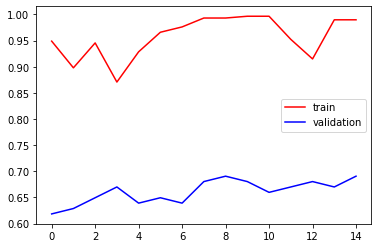

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

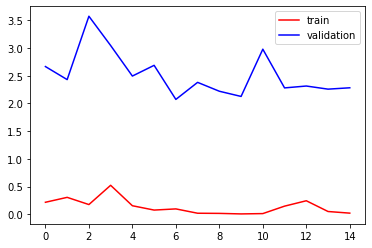

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/apple.jpg')

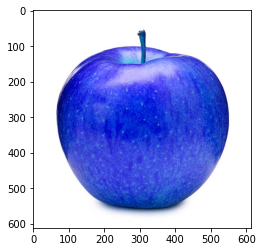

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(612, 612, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 50ms/step


array([[0.]], dtype=float32)

In [ ]:
test_img1 = cv2.imread('/content/tomato.jpg')

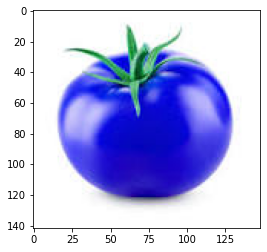

In [ ]:
plt.imshow(test_img1)

In [ ]:
test_img1.shape

(142, 148, 3)

In [ ]:
test_img1 = cv2.resize(test_img1,(256,256))

In [ ]:
test_input = test_img1.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 36ms/step


array([[1.]], dtype=float32)